# Ultimate Technologies, Inc. -- Data Science Take-Home Challenge

### Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

## Part 1: Exploratory Data Analysis
- Aggregate time stamps into 15 minute intervals
- Visualize time frame in way that best shows underlying patterns of demand
    - Monthly, Weekly, Daily, Hourly distribution
- Report important features regarding demand

## Part 2: Experiment and Metrics Design 
- Answer Questions from file 

## Part 3: Predictive Modeling
Ultimate is interested in predicting rider retention. To help explore this question, we haveprovided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if theywere “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictorsfor retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detaileddescription of the dataset. Please include any code you wrote for the analysis and delete thedataset when you have finished with the challenge.

- Perform any cleaning, exploratory analysis, and/or visualizations to use the provideddata for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
- Build a predictive model to help Ultimate determine whether or not a user will be activein their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
- Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).
    
    Data description: 
    - city: city this user signed up in
    - phone: primary device for this user 
    - signup_date: date of account registration; in the form ‘YYYY MM DD’
    - last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
    - avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    - avg_rating_by_driver: the rider’s average rating over all of their trips
    - avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    - surge_pct: the percent of trips taken with surge multiplier > 1
    - avg_surge: The average surge multiplier over all of this user’s trips
    - trips_in_first_30_days: the number of trips this user took in the first 30 days aftersigning up
    - ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;FALSE otherwise
    - weekday_pct: the percent of the user’s trips occurring during a weekday

In [1]:
# import necessary libararies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#load df 
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## 1. Exploratory Data Analysis

In [3]:
#See what we are working with in terms of duration 
print("First Entry in Database: ", min(df["login_time"]))
print("Last Entry in database: ", max(df["login_time"]), '\n')

print("Total # of Entries: ", len(df))

First Entry in Database:  1970-01-01 20:12:16
Last Entry in database:  1970-04-13 18:57:38 

Total # of Entries:  93142


We are observing dates from 1970 exlusively, and only in the first four months. There are over 93,000 entries in that time span. I am not sure how there would be digital timestamps of 'logins' in 1970...seems a little odd, but let's roll with it. 

In [4]:
#aggregate columns into 15 minute intervals
df.set_index('login_time', inplace=True)
df['login_count'] = 1
df.sort_index(inplace=True)
df_15m = df.resample("15min").sum()
df_15m

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [5]:
#verify we haven't lost any of the datapoints 
df_15m['login_count'].sum()

93142

In [6]:
#Add hour, day and month columns to DF
df_15m['hour'] = df_15m.index.hour
df_15m['day'] = df_15m.index.day
df_15m['month'] = df_15m.index.month
df_15m['day_of_week'] = df_15m.index.dayofweek
df_15m

,login_count,hour,day,month,day_of_week
login_time,,,,,
1970-01-01 20:00:00,2,20,1,1,3
1970-01-01 20:15:00,6,20,1,1,3
1970-01-01 20:30:00,9,20,1,1,3
1970-01-01 20:45:00,7,20,1,1,3
1970-01-01 21:00:00,1,21,1,1,3
...,...,...,...,...,...
1970-04-13 17:45:00,5,17,13,4,0
1970-04-13 18:00:00,5,18,13,4,0
1970-04-13 18:15:00,2,18,13,4,0


In [7]:
df_15m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   login_count  9788 non-null   int64
 1   hour         9788 non-null   int64
 2   day          9788 non-null   int64
 3   month        9788 non-null   int64
 4   day_of_week  9788 non-null   int64
dtypes: int64(5)
memory usage: 458.8 KB


All of the columns are the same length, none of the dates have been omitted, and we are ready to visualize our data to gather insight on any underlying patterns of demand.

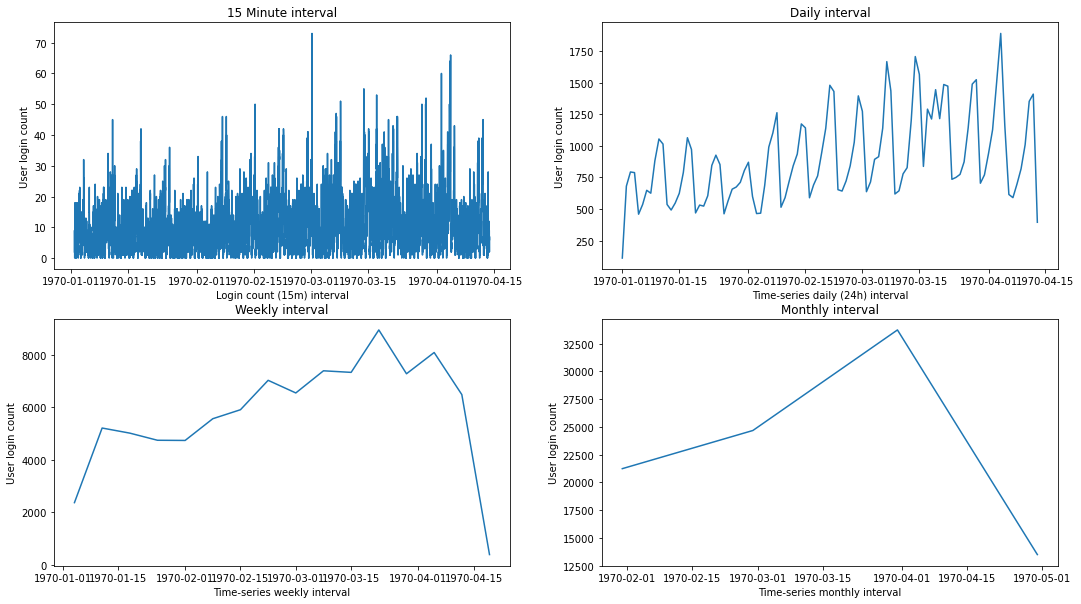

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,10));

# 15-min interval
ax1.plot(df.resample('15T').sum());
ax1.set(xlabel='Login count (15m) interval', ylabel='User login count', title='15 Minute interval');

# Daily interval
ax2.plot(df.resample('D').sum());
ax2.set(xlabel='Time-series daily (24h) interval', ylabel='User login count', title='Daily interval');

# Weekly interval
ax3.plot(df.resample('W').sum());
ax3.set(xlabel='Time-series weekly interval', ylabel='User login count', title='Weekly interval');

# Monthly interval
ax4.plot(df.resample('M').sum());
ax4.set(xlabel='Time-series monthly interval', ylabel='User login count', title='Monthly interval');

This graphical visualization is very insightful. We see that the Daily interval hints at a weekly trend, perhaps a weekend peak in login? The drop at the end of the weekly and monthly interval graphs are a result of the df covering the first half of March but not the latter half. *Note: There seems to be an upward trend in the data from the beginning of the year to the end of the dataset.*

Let's check the distribution of login counts per day of the week to determine which days have highest traffic.

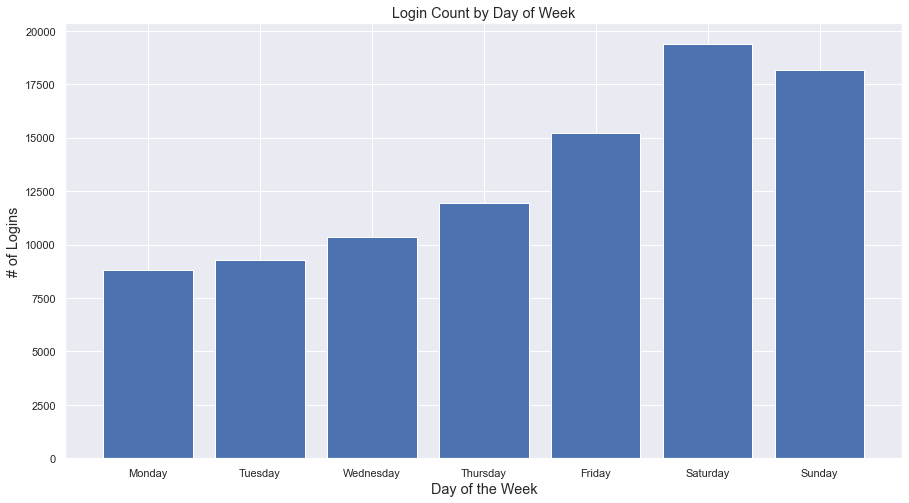

In [9]:
#create bar graph of login counts by day of the week 
df_day = df_15m.groupby('day_of_week').sum()
_ = sns.set()
_ = plt.figure(figsize=(15,8))
_ = plt.bar(df_day.index, df_day['login_count'])
_ = plt.title('Login Count by Day of Week', size='large')
_ = plt.xlabel('Day of the Week', size='large')
_ = plt.ylabel('# of Logins', size='large')
_ = plt.xticks(df_day.index, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Understandably, login counts are higher on the weekend(Friday-Sunday) than during the week. People have more free time and are more likely to utilize this service to get where they are needing to go. Let's break it down by hour. 

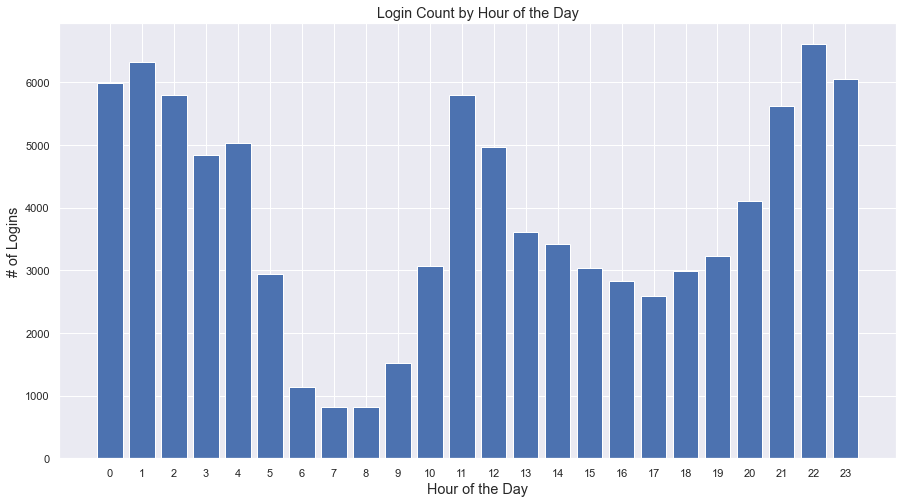

In [10]:
#create bar graph of login counts by day of the week 
df_hour = df_15m.groupby('hour').sum()
_ = sns.set()
_ = plt.figure(figsize=(15,8))
_ = plt.bar(df_hour.index, df_hour['login_count'])
_ = plt.title('Login Count by Hour of the Day', size='large')
_ = plt.xlabel('Hour of the Day', size='large')
_ = plt.ylabel('# of Logins', size='large')
_ = plt.xticks(df_hour.index)

There are two peak login count periods: Noon-2pm (lunch time) and 8pm-3am (dinner-bars/clubs closing). 

Overall, we can see that there is an upward trend in the data from January through Mid-March. The highest traffic by login count is found on the weekends and during lunch and dinner rushes with the latter tailing off around bar-close time. 

## Experiment and Metrics Design

#### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Metropolis is most active during the day. On weekends, there is reasonable activity in both cities

#### However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment inencouraging driver partners to serve both cities, and why would you choose this metric?

Answer: 

- A key measure of success would be the number of times a given driver crossed the bridge on average before this experiment was in effect compared to during the experiment. The city managers would like to see an increase in traffic across the toll bridges during the experiment period as indication of driver partners venturing into the neighboring city more regularly.  

2. Describe a practical experiment you would design to compare the effectiveness of theproposed change in relation to the key measure of success. Please provide details on:

    - how will you implement the experiment. 
    
Implementation: 

- null hypothesis(a): There is no increase in traffic from either driver service across the toll bridge during the reimbursement period.
- data(a): gather vehicle information on drivers for each driver service, calculate average number of toll bridge crossings per week before the proposed reimbursment period and during the reimbursement period. 
- crossing the bridge = crossing through toll + completing driver service transaction in other city 

    - what statistical test(s) you will conduct to verify the significance of the observation

Statistical Testing: 

- Using a z-test with a signifance value at .05. Calculate a z-score of the average number of toll bridge crossings per driver during the reimbursement period. If the z-score is < .05, the number of crossings per driver involved in the experiment has increased enought to be stastically significant. *Note: p-value will fluctuate depending on sample size. If there are not enough drivers to pull data from, the reliability of the rejection of this null hypothesis will decrease.*

    - how you would interpret the results and provide recommendations to the cityoperations team along with any caveats.

Interpretation: 

- If there is an increase in traffic, and the null hypothesis is refuted, we can accept that the reimbursement period was a success and incentivized crossing the toll bridge for the drivers. In combination with these results I would want to compare the gross profits per month for at least 12 months prior to the experiment to the gross profits during the experiment month. If there was an increase in profits during this period, I would suggest a continuation of this reimbursement strategy. 




## 3. Predictive Modeling

- Data description: 
    - city: city this user signed up in
    - phone: primary device for this user 
    - signup_date: date of account registration; in the form ‘YYYY MM DD’
    - last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
    - avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    - avg_rating_by_driver: the rider’s average rating over all of their trips
    - avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    - surge_pct: the percent of trips taken with surge multiplier > 1
    - avg_surge: The average surge multiplier over all of this user’s trips
    - trips_in_first_30_days: the number of trips this user took in the first 30 days aftersigning up
    - ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;FALSE otherwise
    - weekday_pct: the percent of the user’s trips occurring during a weekday

### Exploratory Data Analysis

In [11]:
df_ult = pd.read_json('ultimate_data_challenge.json')
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


It seems as though we have some NaN values for 'avg_rating_of_driver', 'phone', and 'avg_rating_by_driver'. Let's determine a value to impute for these missing values. 

In [12]:
df_ult['avg_rating_of_driver'].value_counts(dropna=False)

5.0    20771
NaN     8122
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.9        1
1.6        1
Name: avg_rating_of_driver, dtype: int64

In [13]:
# Let's impute the median rating, 5.0, into the missing values. 
df_ult['avg_rating_of_driver'] = df_ult['avg_rating_of_driver'].fillna(5.0)
df_ult['avg_rating_of_driver'].isna().sum()

0

In [14]:
df_ult['phone'].value_counts(dropna=False)

iPhone     34582
Android    15022
NaN          396
Name: phone, dtype: int64

In [15]:
#the number of missing values is small. Let's impute 'unknown' into the missing values. 
df_ult['phone'] = df_ult['phone'].fillna('unknown')
df_ult['phone'].isna().sum()

0

In [16]:
df_ult['avg_rating_by_driver'].value_counts(dropna=False)

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
NaN      201
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
2.7        2
3.2        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

In [17]:
#similar to the prior avg rating, let's impute the median amount, 5.0, into the missing values
df_ult['avg_rating_by_driver'] = df_ult['avg_rating_by_driver'].fillna(5.0)
df_ult['avg_rating_by_driver'].isna().sum()

0

Great! We have dealt with our NaN values, and we can focus on converting our date columns to datetime objects. 

In [18]:
df_ult['signup_date'] = pd.to_datetime(df_ult['signup_date'])
df_ult['last_trip_date'] = pd.to_datetime(df_ult['last_trip_date'])
df_ult[['signup_date', 'last_trip_date']].dtypes

signup_date       datetime64[ns]
last_trip_date    datetime64[ns]
dtype: object

In [19]:
last_trip_date = df_ult['last_trip_date'].max()
last_trip_date

Timestamp('2014-07-01 00:00:00')

In [20]:
#the latest trip date was on July 1st, 2014. Let's create a column for 'active_users'
df_ult['active_user'] = df_ult['last_trip_date'] >= '2014-06-01 00:00:00'
df_ult['active_user']

0         True
1        False
2        False
3         True
4        False
         ...  
49995     True
49996    False
49997    False
49998    False
49999    False
Name: active_user, Length: 50000, dtype: bool

In [21]:
#determine percentage of retained users in last 30 days. 
retained_users_pct = (len(df_ult[df_ult['active_user'] ==  True]) / len(df_ult['active_user'])) * 100
print('Percentage of retained users:', retained_users_pct, '%')

Percentage of retained users: 37.608000000000004 %


So we now know that there are just under 38% of users in the dataset that are active. Let's see if we can note any strong correlations between features before we build our model using the 'active' feature as our predictor variable. 

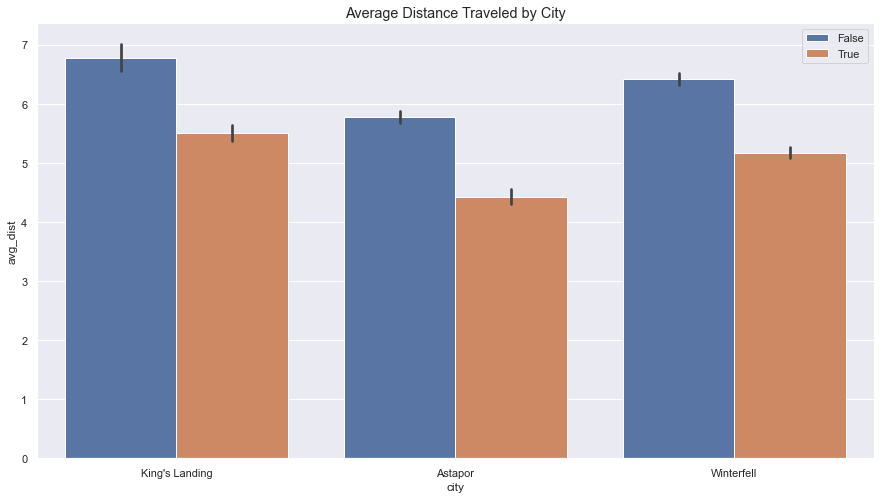

In [22]:
#plot the average distance by city for active and inactive users 
_ = sns.set()
_ = plt.figure(figsize=(15,8))
_ = sns.barplot(x="city", y="avg_dist", hue='active_user', data=df_ult)
_ = plt.title("Average Distance Traveled by City", size='large')
_ = plt.legend(loc='upper right')

Here we see that inactive users tended to travel further than active users in each city. Perhaps the length of the trip, how it boosted the price of the fare, has a strong correlation to whether or not consumers continue to seek out Ultimate as an option or look for something else. Let's look and see how the number of trips in the first 30 days varies between active and inactive users.

Text(0.5, 1.0, '# of trips in First 30 days')

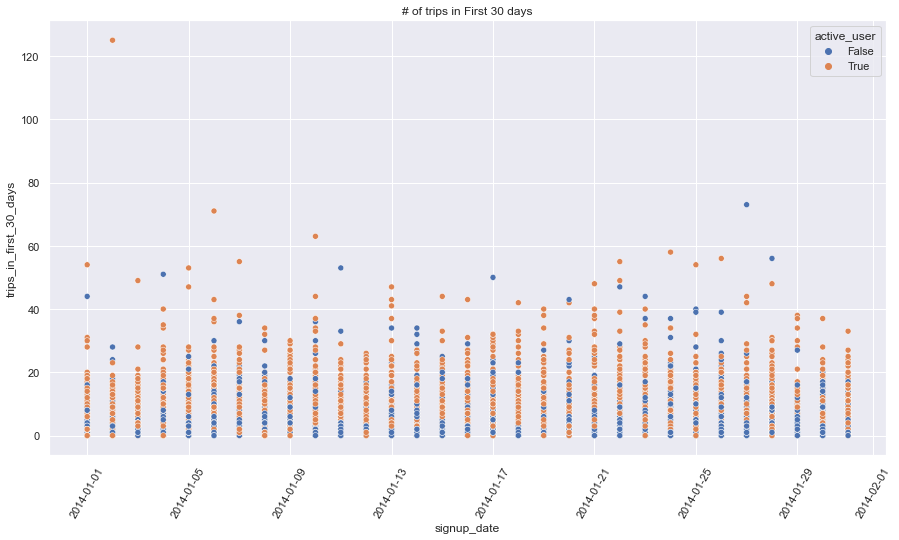

In [23]:
#plot number of trips in first 30 days by active and inactive users. 
plt.figure(figsize=(15,8))
sns.scatterplot(x= 'signup_date', y='trips_in_first_30_days', hue='active_user', data=df_ult)
plt.xticks(rotation=60)
plt.title('# of trips in First 30 days')

As we can see by the graphical representation, active users tended to take more trips in the first 30 days while inactive users did not. Thus, if a user is more active in their first 30 days, it increases the likelihood that they will be retained. 

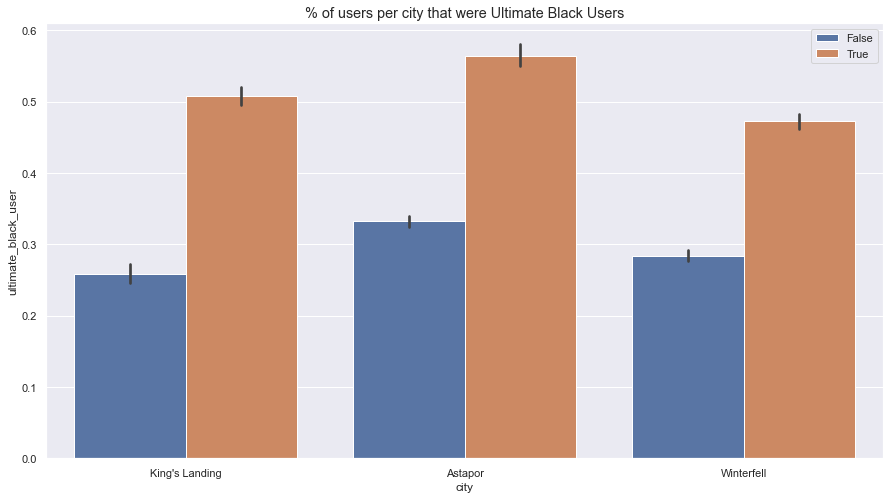

In [24]:
#plot avg ultimate black user by city and active and inactive 
_ = sns.set()
_ = plt.figure(figsize=(15,8))
_ = sns.barplot(x="city", y="ultimate_black_user", hue='active_user', data=df_ult)
_ = plt.title("% of users per city that were Ultimate Black Users", size='large')
_ = plt.legend(loc='upper right')

Here we see that active users were more likely to subscribe to the Ultimate Black User plan than inactive users.

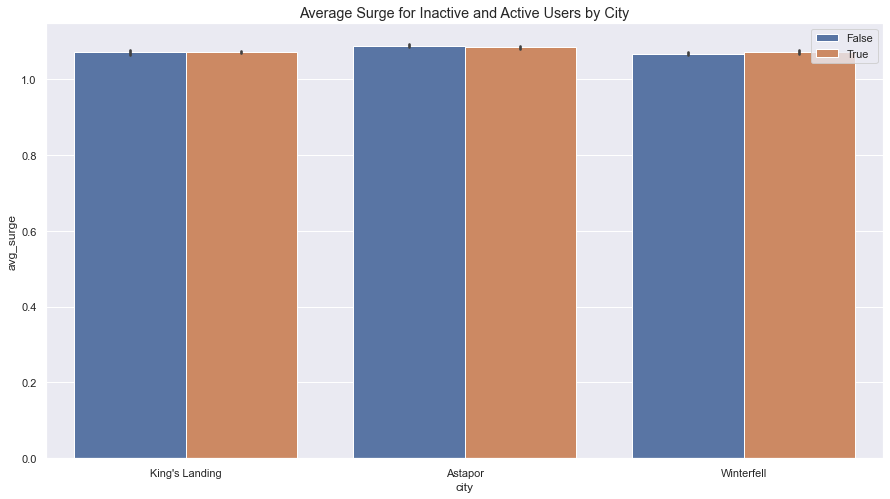

In [25]:
#plot the average distance by city for active and inactive users 
_ = sns.set()
_ = plt.figure(figsize=(15,8))
_ = sns.barplot(x="city", y="avg_surge", hue='active_user', data=df_ult)
_ = plt.title("Average Surge for Inactive and Active Users by City", size='large')
_ = plt.legend(loc='upper right')

We can see that there is no difference in Average Surge between Active and Inactive Users. We can assume that the Surge Percentage is similarly distributed. Now that we have looked through some of the data, let's drop some variables that probably will not have high correlation to whether or not someone is retained: 'Phone', 'Surge_Pct', and 'Avg_Surge'. We can also drop 'last_trip_date' and 'signup_date' as they were used to create the target variable. 

### Data Preparation for Machine Learning 

In [26]:
#drop columns
df_ult.drop(['surge_pct', 'avg_surge', 'phone', 'last_trip_date', 'signup_date'], inplace=True, axis=1)
df_ult

,city,trips_in_first_30_days,avg_rating_of_driver,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,4.7,True,46.2,3.67,5.0,True
1,Astapor,0,5.0,False,50.0,8.26,5.0,False
2,Astapor,3,4.3,False,100.0,0.77,5.0,False
3,King's Landing,9,4.6,True,80.0,2.36,4.9,True
4,Winterfell,14,4.4,False,82.4,3.13,4.9,False
...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,False,100.0,5.63,4.2,True
49996,Astapor,1,5.0,False,0.0,0.00,4.0,False
49997,Winterfell,0,5.0,True,100.0,3.86,5.0,False
49998,Astapor,2,3.0,False,100.0,4.58,3.5,False


In [27]:
#convert 'city', 'ultimate_black_user', and 'active_user' to integers
cities = {'Winterfell': 1, 'Astapor': 2, "King's Landing": 3}
df_ult['city'] = df_ult['city'].map(lambda x: cities[x])
df_ult['ultimate_black_user'] = df_ult['ultimate_black_user'].map(lambda b: 1 if b == True else 0)
df_ult['active_user'] = df_ult['active_user'].map(lambda b: 1 if b == True else 0)
df_ult

,city,trips_in_first_30_days,avg_rating_of_driver,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,3,4,4.7,1,46.2,3.67,5.0,1
1,2,0,5.0,0,50.0,8.26,5.0,0
2,2,3,4.3,0,100.0,0.77,5.0,0
3,3,9,4.6,1,80.0,2.36,4.9,1
4,1,14,4.4,0,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...
49995,3,0,5.0,0,100.0,5.63,4.2,1
49996,2,1,5.0,0,0.0,0.00,4.0,0
49997,1,0,5.0,1,100.0,3.86,5.0,0
49998,2,2,3.0,0,100.0,4.58,3.5,0


Great, now let's set the predictor variable and continuous variables for our Random Forest Classifier Model.

In [28]:
#set X and y variables
X = df_ult[['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']]
y = df_ult['active_user']

In [29]:
#import libraries for Logistic Regression and performance metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [30]:
#train/test split at 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

In [31]:
#resample data to account for imbalance between Active and Inactive users (2:1 ratio)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
#construct Logistic Regression model
clf = RandomForestClassifier(n_estimators=10000)
#fit the model on the training data
clf.fit(X_resampled, y_resampled)
#introduce variable to be reused later 
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_resampled)
RF_report = classification_report(y_test, y_predict_test, output_dict=True)
print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      6237
           1       0.62      0.70      0.66      3763

    accuracy                           0.73     10000
   macro avg       0.71      0.72      0.71     10000
weighted avg       0.73      0.73      0.73     10000



As we can see from the classification report, the Random Forest Model is performing decently well. The overall accuracy in predicting whether a user will be active or not stands at 73%. Let's look into which features are most important in determining whether a user will be retained. 

In [41]:
df_features = pd.DataFrame({'importance': clf.feature_importances_}, index=df_ult.columns[:-1])

In [42]:
df_features.sort_values('importance', ascending=False)

,importance
avg_dist,0.363094
avg_rating_by_driver,0.177340
weekday_pct,0.156387
avg_rating_of_driver,0.117439
trips_in_first_30_days,0.086596
city,0.076826
ultimate_black_user,0.022318


### Conclusions: I determined that roughly 36% of users were retained based off of the criteria laid out by Ultimate Technologies. After determining which continuous variables were strongly correlated to whether a user was active or not, I utilized a Random Forest Model to predict whether a user would be retained or not based on those continuous variables with 73% accuracy. We can see that the features that are most important are as follows: Average Distance, Average Rating by Driver, Weekday Percentage, and Average Rating of Driver. 

### With average distance being a key indicator of whether a user is retained, focusing on providing discount prices to users who travel further per ride could incentivize retention among users. Implementing measures to ensure positive experiences for drivers is also critical in increasing the rating by driver per ride. It may be worth providing a discounted rate for users who hit a certain number of rides during the week to increase the number of weekday trips. 

###